<a href="https://colab.research.google.com/github/linsut/DatSci/blob/master/iris_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original provided by the author in GitHub: https://github.com/ageron/handson-ml/blob/9798a68ded892679957b8a1303ea0b7d0f75fe92/04_training_linear_models.ipynb
from the exceptional book: _Hands on Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron, OReilly 2017, ISBN: 9781491962299_

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [2]:
X = iris["data"]  # all features
y = (iris["target"] == 2).astype(np.int)  # array of 1 if Iris-Virginica, else 0
print(iris["feature_names"])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


We now train the logistic regression model:

In [3]:
log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

This predicts whether or not the flower is an iris virginica, but visualization is hard since it's four dimensional.

In [4]:
test_data = [[4.8,2.5,5.3,2.4]]
log_reg.predict(test_data)

array([1])

The flower is an iris virginica.

Alternative: Calculate probabilities for each feature and then add them together.


In [5]:
X1 = iris["data"][:, 3:]

log_reg_petal_width = LogisticRegression()
log_reg_petal_width.fit(X1, y)



X2 = iris["data"][:, 2:3]

log_reg_petal_length = LogisticRegression()
log_reg_petal_length.fit(X2, y)

X3 = iris["data"][:, 1:2]

log_reg_sepal_width = LogisticRegression()
log_reg_sepal_width.fit(X3, y)

X4 = iris["data"][:, :1]

log_reg_sepal_length = LogisticRegression()
log_reg_sepal_length.fit(X4, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

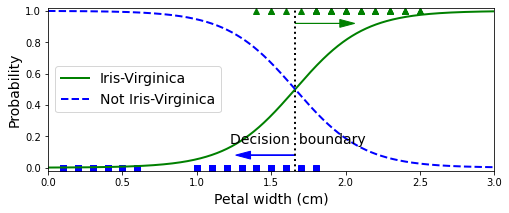

[1.66066066]


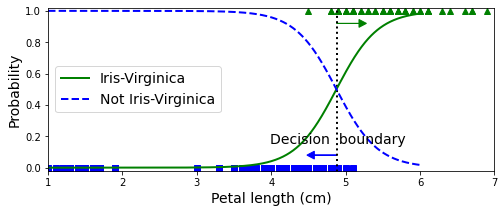

[4.87887888]


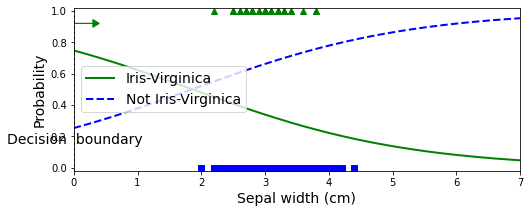

[0.]


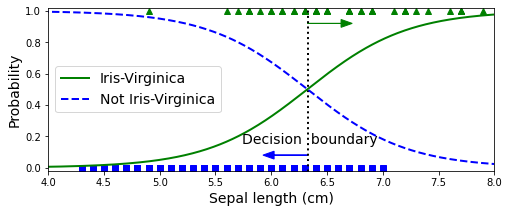

[6.32532533]
[1] [1] [0] [0]
[0.88079708]


In [6]:
X_new  =  np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg_petal_width.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X1[y==0], y[y==0], "bs")
plt.plot(X1[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

print(decision_boundary)

X_new  =  np.linspace(1, 6, 1000).reshape(-1, 1)
y_proba = log_reg_petal_length.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X2[y==0], y[y==0], "bs")
plt.plot(X2[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([1, 7, -0.02, 1.02])
plt.show()

print(decision_boundary)

X_new  =  np.linspace(0, 7, 1000).reshape(-1, 1)
y_proba = log_reg_sepal_width.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X3[y==0], y[y==0], "bs")
plt.plot(X3[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Sepal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, -0.02, 1.02])
plt.show()

print(decision_boundary)


X_new  =  np.linspace(1, 8, 1000).reshape(-1, 1)
y_proba = log_reg_sepal_length.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X4[y==0], y[y==0], "bs")
plt.plot(X4[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Sepal length (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([4, 8, -0.02, 1.02])
plt.show()

print(decision_boundary)


pred_petal_width = log_reg_petal_width.predict([[2.4]])
pred_petal_length = log_reg_petal_length.predict([[5.3]])
pred_sepal_width = log_reg_sepal_width.predict([[2.5]])
pred_sepal_length = log_reg_sepal_length.predict([[4.8]])

print(pred_petal_width, pred_petal_length, pred_sepal_width, pred_sepal_length)
#No weights
print(1/(1+np.exp(-(pred_petal_width + pred_petal_length + pred_sepal_width + pred_sepal_length))))

The prediction (without weights) would still be that it is an iris virginica, also visible in the graphs. The Sepal width does not seem relevant to this classification, though.